# Clustering Model - Credit Card Dataset
## by Tanishq Kaushik

## Data Loading and Cleaning

In [47]:
# Loading librarie

import pandas as pd
import numpy as np
import seaborn as sns # For creating the plots

In [48]:
# Creating a data frame using the csv file
df_original = pd.read_csv('credit_dataset.csv')
df_original.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [49]:
# The number of rows and columns in the dataset
print('The number of Rows in the dataset:' , df_original.shape[0])
print('The number of Columns in the dataset:', df_original.shape[1])

The number of Rows in the dataset: 8950
The number of Columns in the dataset: 18


In [50]:
# Dropping the first column since it is a primary key and not required for our analysis
df_original.drop('CUST_ID', axis=1, inplace=True)

In [51]:
# Replacing all infinity values with nan values
df_original.replace([np.inf, -np.inf], np.nan, inplace=True)

# Removing all nan values
df_original = df_original.dropna()

In [52]:
# Checking the stats of all the columns in the dataframe
df_original.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [53]:
# Applying Normalization to the data 
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(df_original)
df = norm.transform(df_original)

In [54]:
# Applying Standardization to the data
# from sklearn.preprocessing import StandardScaler  
# scaler = StandardScaler().fit(df)  
# df = scaler.transform(df) 

### I have chosen Normalization instead of Standardizatoin since its giving lower values of SSE

## K-Means Clustering Algorithm

In [55]:
# Importing the necessary library

from sklearn.cluster import KMeans

In [56]:
# Creating a copy of the dataframe

X = df

### Running K-Means with 2 clusters but with differnt seeds to notice the effect on SSE

In [57]:
kmeans1_1 = KMeans(n_clusters=2, random_state=99, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse1 = kmeans1_1.inertia_ #.inertia_ is the method used to get the SSE
sse1

3300.7155556099283

In [58]:
kmeans1_2 = KMeans(n_clusters=2, random_state=1, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse2 = kmeans1_2.inertia_
sse2

3300.7148795068624

In [59]:
kmeans1_3 = KMeans(n_clusters=2, random_state=20, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse3 = kmeans1_3.inertia_
sse3

3300.7150608010725

In [60]:
# Recording the minimum SSE
min_sse = min(sse1,sse2,sse3)
min_sse

3300.7148795068624

In [61]:
# Appending the min SSE to the list called Errors

Errors = []
Errors.append(min_sse)

### Running the algorithm for K = 3

In [62]:
# Running KMeans for 3 different random states

kmeans2_1 = KMeans(n_clusters=3, random_state=99, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse1 = kmeans2_1.inertia_
kmeans2_2 = KMeans(n_clusters=3, random_state=1, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse2 = kmeans2_2.inertia_
kmeans2_3 = KMeans(n_clusters=3, random_state=20, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse3 = kmeans2_3.inertia_

In [63]:
# Appending the min sse to the Errors list
Errors.append(min(sse1,sse2,sse3))
Errors

[3300.7148795068624, 2739.0054831944176]

### Running the algorithm for K = 4

In [64]:
# Running KMeans for 3 different random states
kmeans3_1 = KMeans(n_clusters=4, random_state=99, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse1 = kmeans3_1.inertia_
kmeans3_2 = KMeans(n_clusters=4, random_state=1, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse2 = kmeans3_2.inertia_
kmeans3_3 = KMeans(n_clusters=4, random_state=20, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse3 = kmeans3_3.inertia_

In [65]:
# Appending the min sse to the Errors list
Errors.append(min(sse1,sse2,sse3))
Errors

[3300.7148795068624, 2739.0054831944176, 2416.173255161476]

### Running the algorithm for K = 5

In [66]:
# Running KMeans for 3 different random states
kmeans4_1 = KMeans(n_clusters=5, random_state=99, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse1 = kmeans4_1.inertia_
kmeans4_2 = KMeans(n_clusters=5, random_state=1, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse2 = kmeans4_2.inertia_
kmeans4_3 = KMeans(n_clusters=5, random_state=20, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse3 = kmeans4_3.inertia_

In [67]:
# Appending the min sse to the Errors list
Errors.append(min(sse1,sse2,sse3))
Errors

[3300.7148795068624, 2739.0054831944176, 2416.173255161476, 2143.1461531647283]

### Running the algorithm for K = 6

In [68]:
# Running KMeans for 3 different random states
kmeans5_1 = KMeans(n_clusters=6, random_state=99, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse1 = kmeans5_1.inertia_
kmeans5_2 = KMeans(n_clusters=6, random_state=1, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse2 = kmeans5_2.inertia_
kmeans5_3 = KMeans(n_clusters=6, random_state=20, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse3 = kmeans5_3.inertia_

In [69]:
# Appending the min sse to the Errors list
Errors.append(min(sse1,sse2,sse3))
Errors

[3300.7148795068624,
 2739.0054831944176,
 2416.173255161476,
 2143.1461531647283,
 1943.9889545565957]

### Running the algorithm for K = 7

In [70]:
# Running KMeans for 3 different random states
kmeans6_1 = KMeans(n_clusters=7, random_state=99, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse1 = kmeans6_1.inertia_
kmeans6_2 = KMeans(n_clusters=7, random_state=1, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse2 = kmeans6_2.inertia_
kmeans6_3 = KMeans(n_clusters=7, random_state=20, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse3 = kmeans6_3.inertia_

In [71]:
# Appending the min sse to the Errors list
Errors.append(min(sse1,sse2,sse3))
Errors

[3300.7148795068624,
 2739.0054831944176,
 2416.173255161476,
 2143.1461531647283,
 1943.9889545565957,
 1755.110505502886]

### Running the algorithm for K = 8

In [72]:
# Running KMeans for 3 different random states
kmeans7_1 = KMeans(n_clusters=8, random_state=99, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse1 = kmeans7_1.inertia_
kmeans7_2 = KMeans(n_clusters=8, random_state=1, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse2 = kmeans7_2.inertia_
kmeans7_3 = KMeans(n_clusters=8, random_state=20, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse3 = kmeans7_3.inertia_

In [73]:
# Appending the min sse to the Errors list
Errors.append(min(sse1,sse2,sse3))
Errors

[3300.7148795068624,
 2739.0054831944176,
 2416.173255161476,
 2143.1461531647283,
 1943.9889545565957,
 1755.110505502886,
 1600.6976005032916]

### Running the algorithm for K = 9

In [74]:
# Running KMeans for 3 different random states
kmeans8_1 = KMeans(n_clusters=9, random_state=99, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse1 = kmeans8_1.inertia_
kmeans8_2 = KMeans(n_clusters=9, random_state=1, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse2 = kmeans8_2.inertia_
kmeans8_3 = KMeans(n_clusters=9, random_state=20, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse3 = kmeans8_3.inertia_

In [75]:
# Appending the min sse to the Errors list
Errors.append(min(sse1,sse2,sse3))
Errors

[3300.7148795068624,
 2739.0054831944176,
 2416.173255161476,
 2143.1461531647283,
 1943.9889545565957,
 1755.110505502886,
 1600.6976005032916,
 1472.0955166546703]

### Running the algorithm for K = 10

In [76]:
# Running KMeans for 3 different random states
kmeans9_1 = KMeans(n_clusters=10, random_state=99, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse1 = kmeans9_1.inertia_
kmeans9_2 = KMeans(n_clusters=10, random_state=1, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse2 = kmeans9_2.inertia_
kmeans9_3 = KMeans(n_clusters=10, random_state=20, algorithm='elkan',n_init = 10).fit(X) # applying clustering algorithm
sse3 = kmeans9_3.inertia_

In [77]:
# Appending the min sse to the Errors list
Errors.append(min(sse1,sse2,sse3))
Errors

[3300.7148795068624,
 2739.0054831944176,
 2416.173255161476,
 2143.1461531647283,
 1943.9889545565957,
 1755.110505502886,
 1600.6976005032916,
 1472.0955166546703,
 1358.663933545895]

### Creating a line chart using the errors

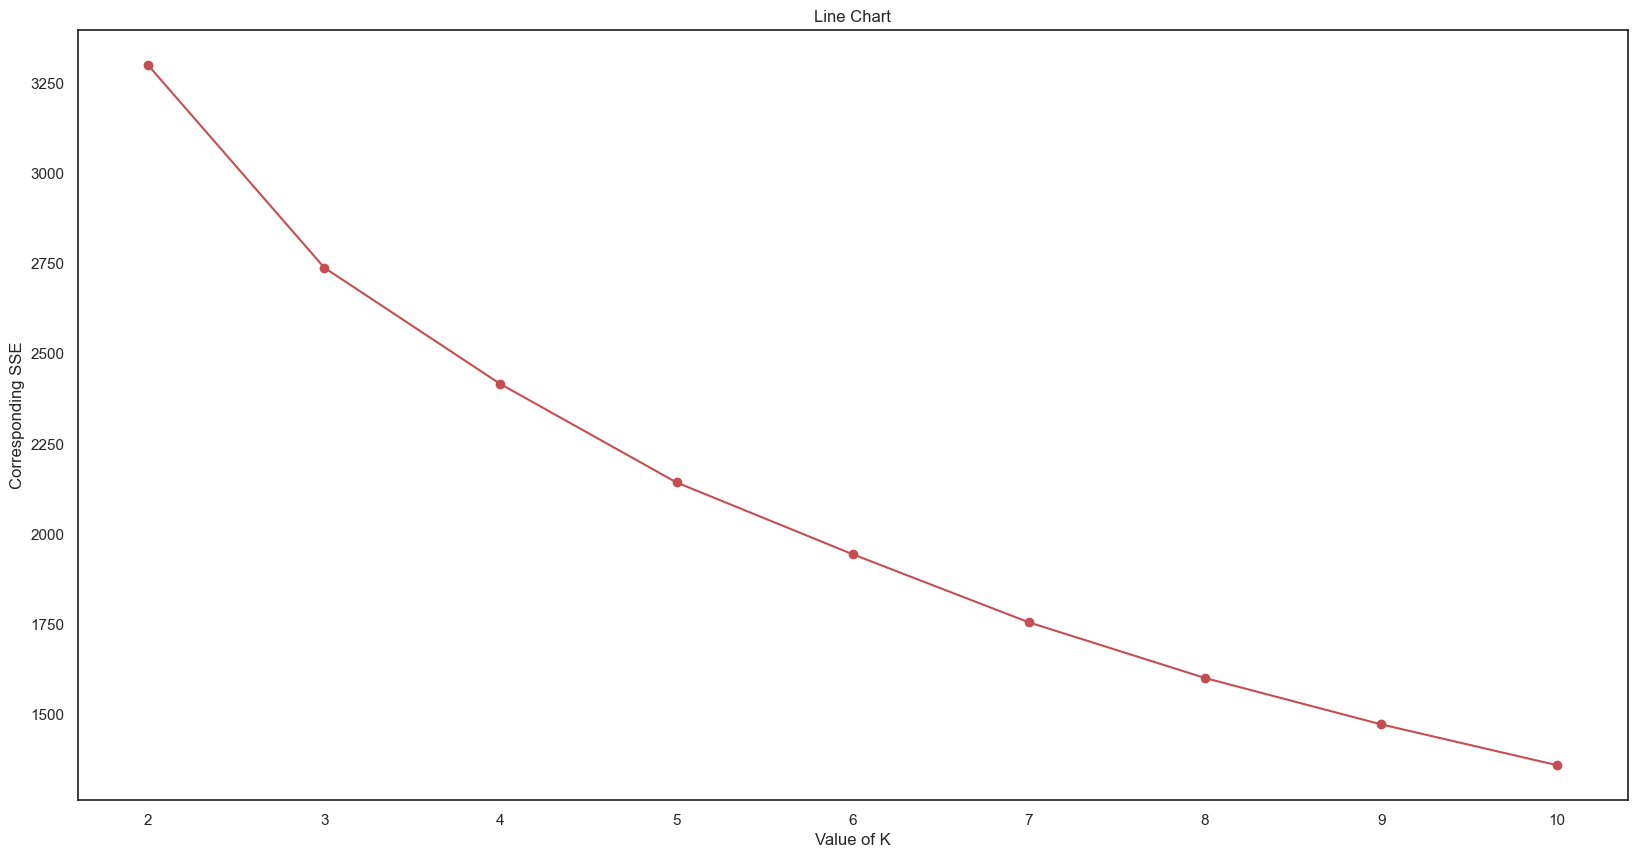

In [78]:
import matplotlib.pyplot as plt

x_axis = [2, 3, 4, 5, 6, 7, 8, 9, 10]
y_axis = Errors

plt.plot(x_axis, y_axis,'-or')
plt.title('Line Chart')
plt.xlabel('Value of K')
plt.ylabel('Corresponding SSE')
plt.show()

### According to elbow method the best cluster number is 5

## Cluster Visualizations
Here I'm using `umap` package to reduce dimensions of the data to two dimensions so that I can visualize the data.

In [79]:
# Installing the package
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [80]:
# Importing the umap module and creating a reducer object
import umap
reducer = umap.UMAP()

In [81]:
# Transforming each data to a 2-D point 
embedding = reducer.fit_transform(X)
embedding.shape

(8636, 2)

In [82]:
# Checking the 2D array
len(embedding)

8636

In [83]:
# Retrieving the cluster labels

df_original['labels_1'] = kmeans1_1.labels_
df_original['labels_2'] = kmeans2_1.labels_
df_original['labels_3'] = kmeans3_1.labels_
df_original['labels_4'] = kmeans4_1.labels_
df_original['labels_5'] = kmeans5_1.labels_
df_original['labels_6'] = kmeans6_1.labels_
df_original['labels_7'] = kmeans7_1.labels_
df_original['labels_8'] = kmeans8_1.labels_
df_original['labels_9'] = kmeans9_1.labels_

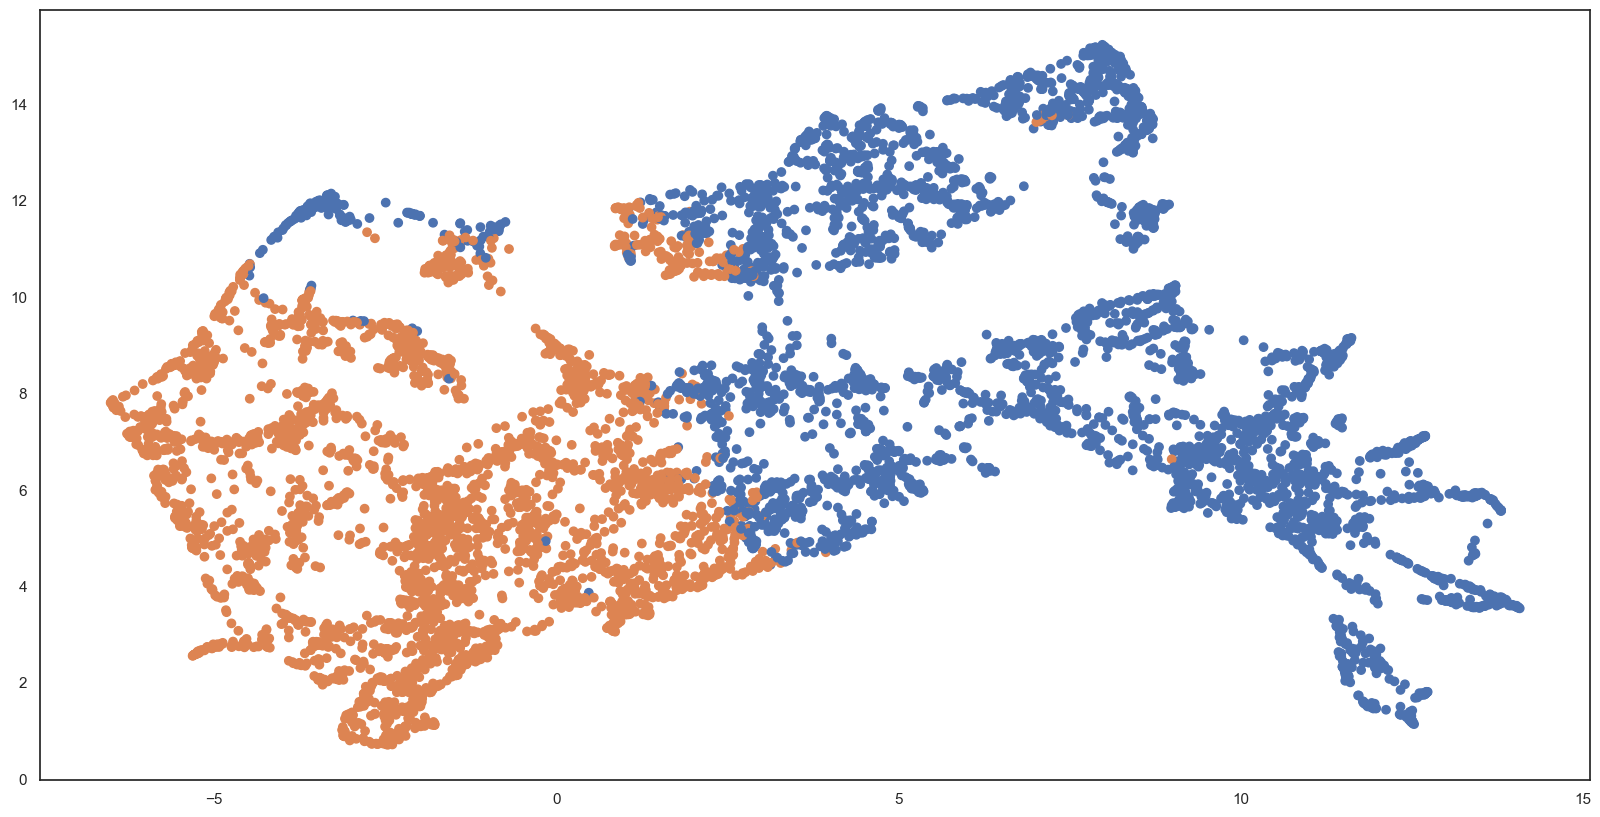

In [84]:
# Plot for 2 clusters

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(20,10)})

fig, ax = plt.subplots(1,1)


ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_original.labels_1]
    )

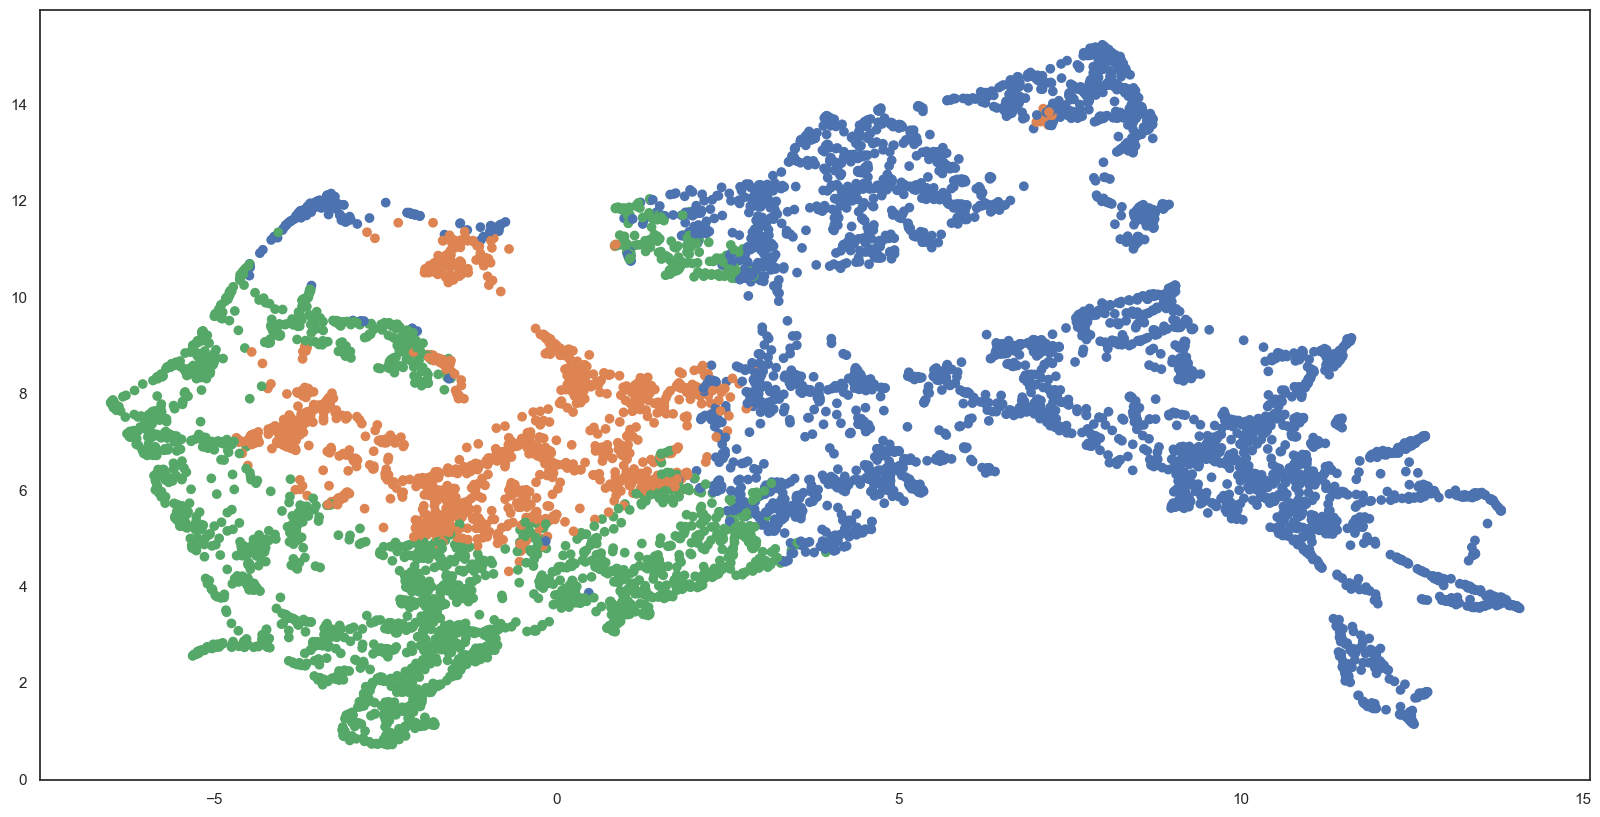

In [85]:
# Plot for 3 clusters

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(20,10)})

fig, ax = plt.subplots(1,1)


ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_original.labels_2]
    )

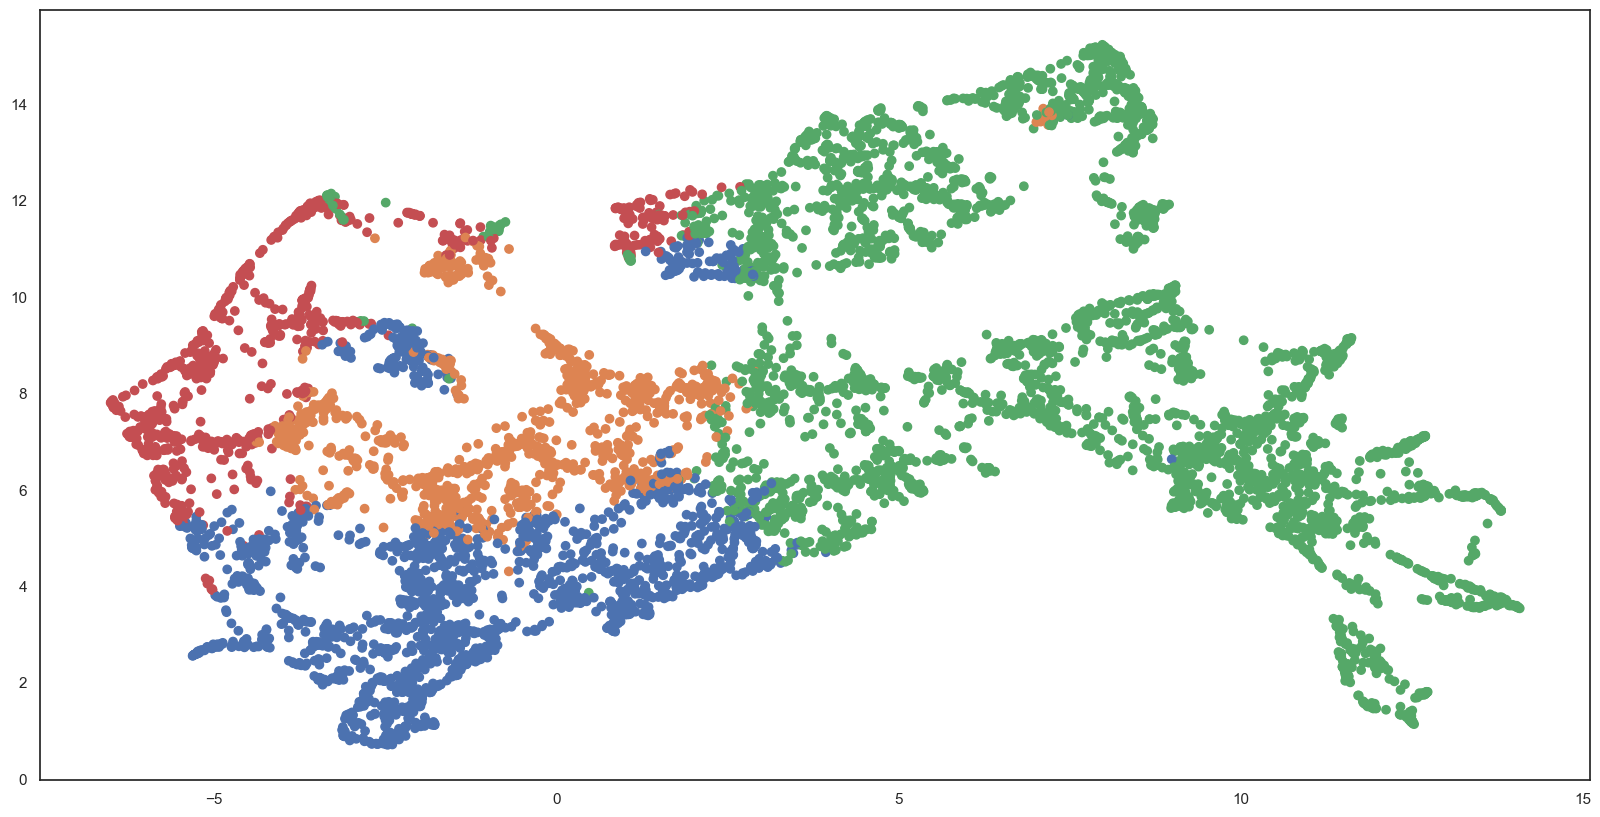

In [86]:
# Plot for 4 clusters

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(20,10)})

fig, ax = plt.subplots(1,1)


ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_original.labels_3]
    )

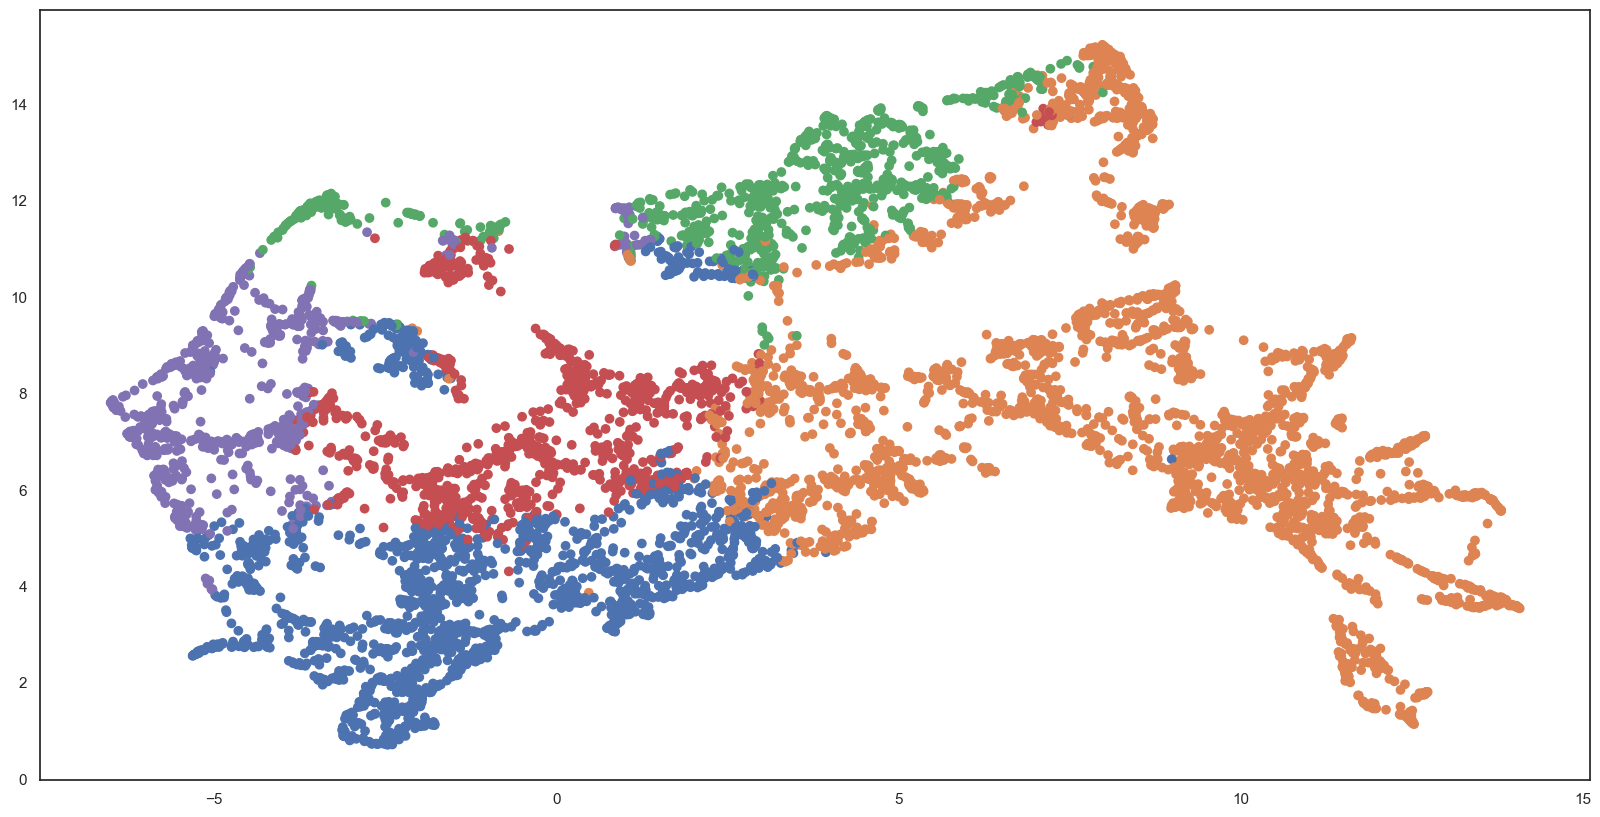

In [87]:
# Plot for 5 clusters

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(20,10)})

fig, ax = plt.subplots(1,1)


ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_original.labels_4]
    )

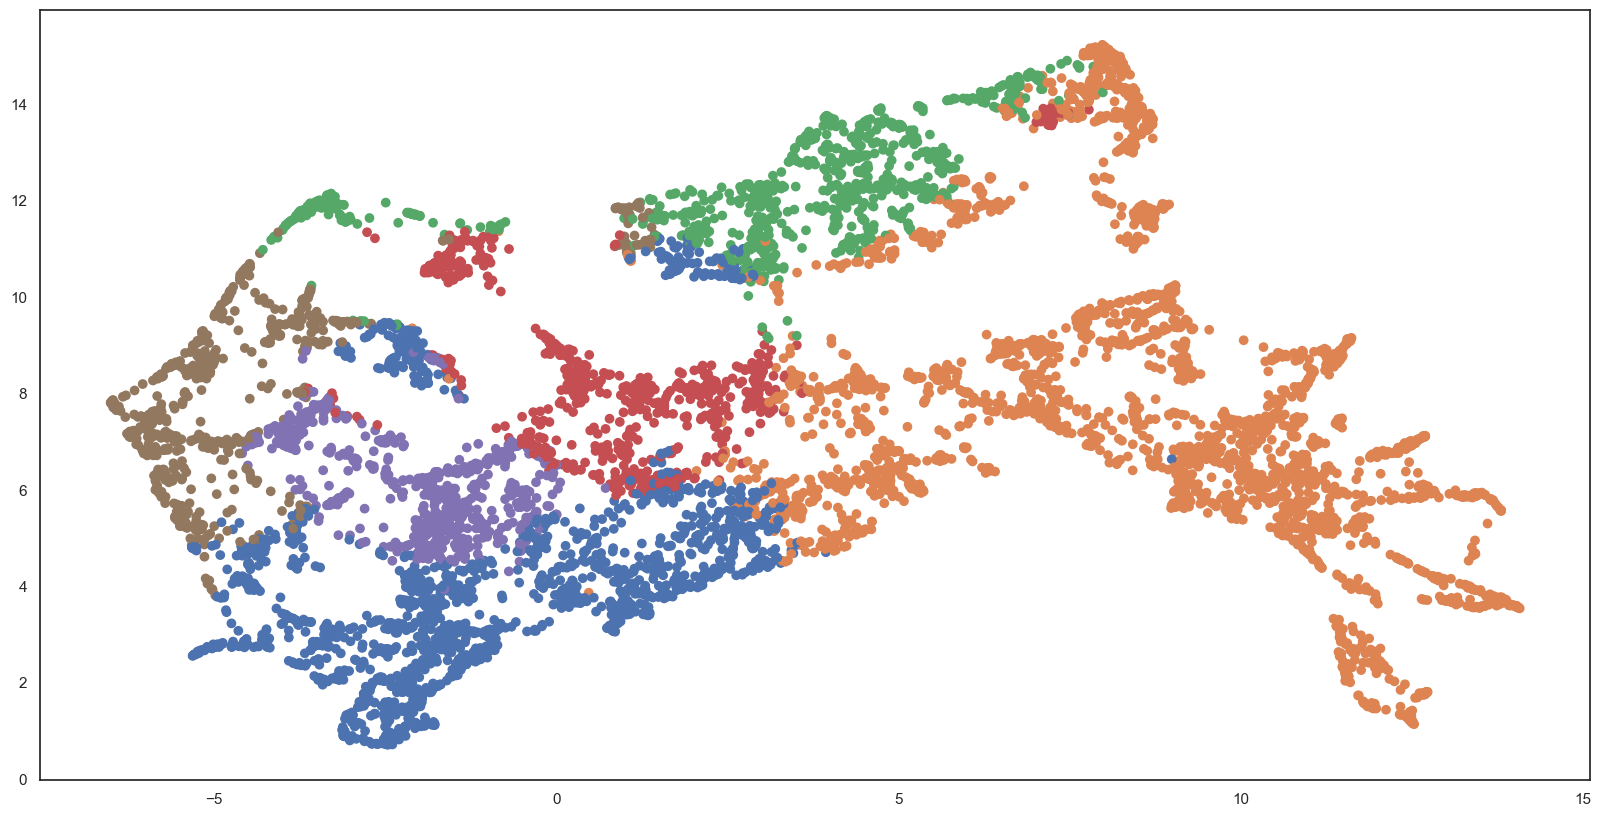

In [88]:
# Plot for 6 clusters

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(20,10)})

fig, ax = plt.subplots(1,1)


ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_original.labels_5]
    )

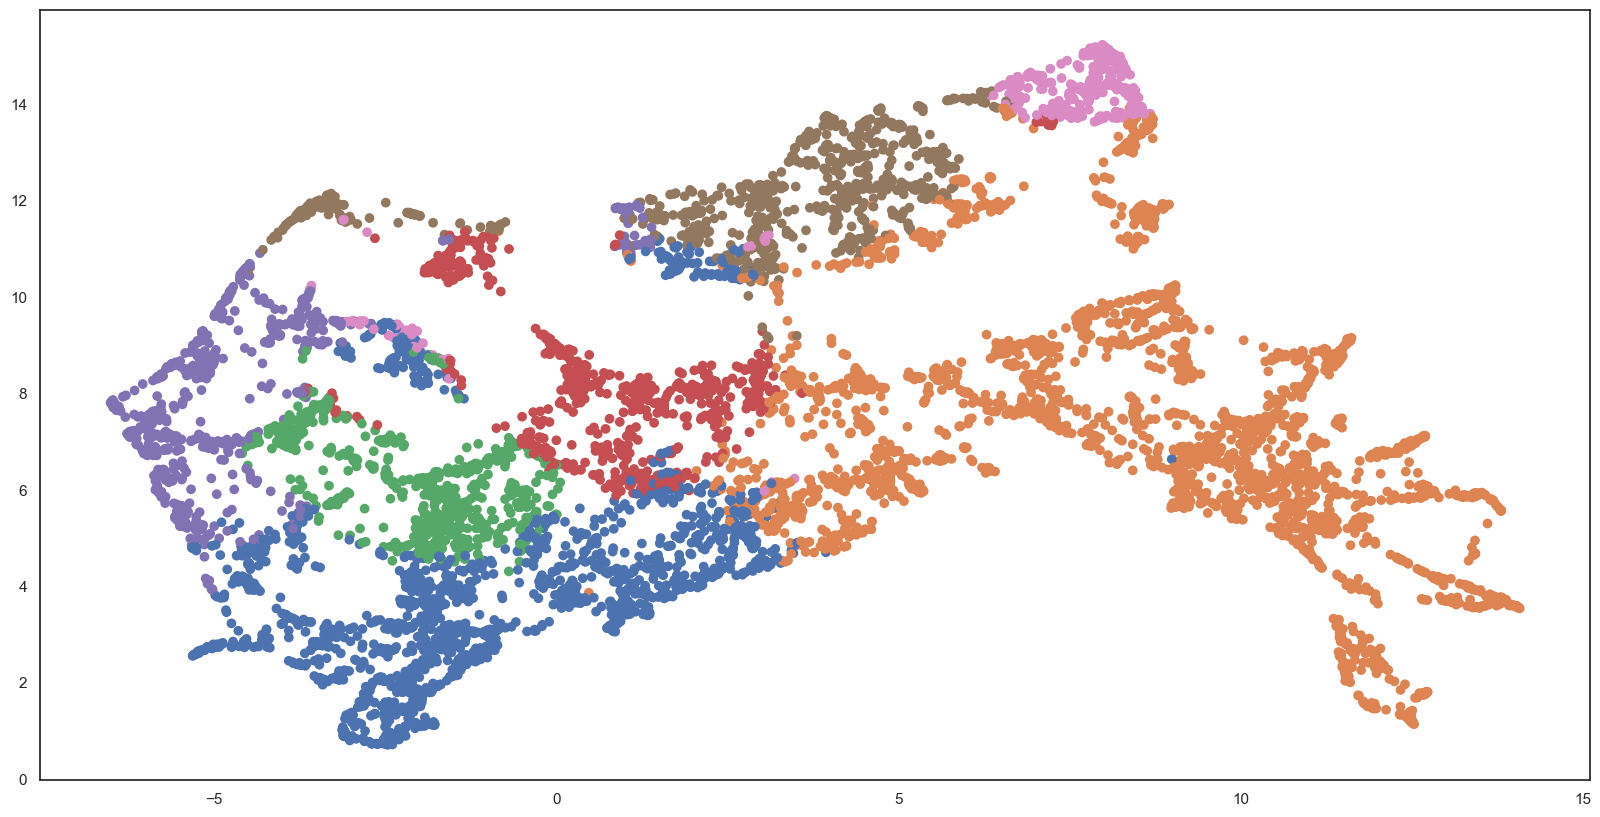

In [89]:
# Plot for 7 clusters

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(20,10)})

fig, ax = plt.subplots(1,1)


ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_original.labels_6]
    )

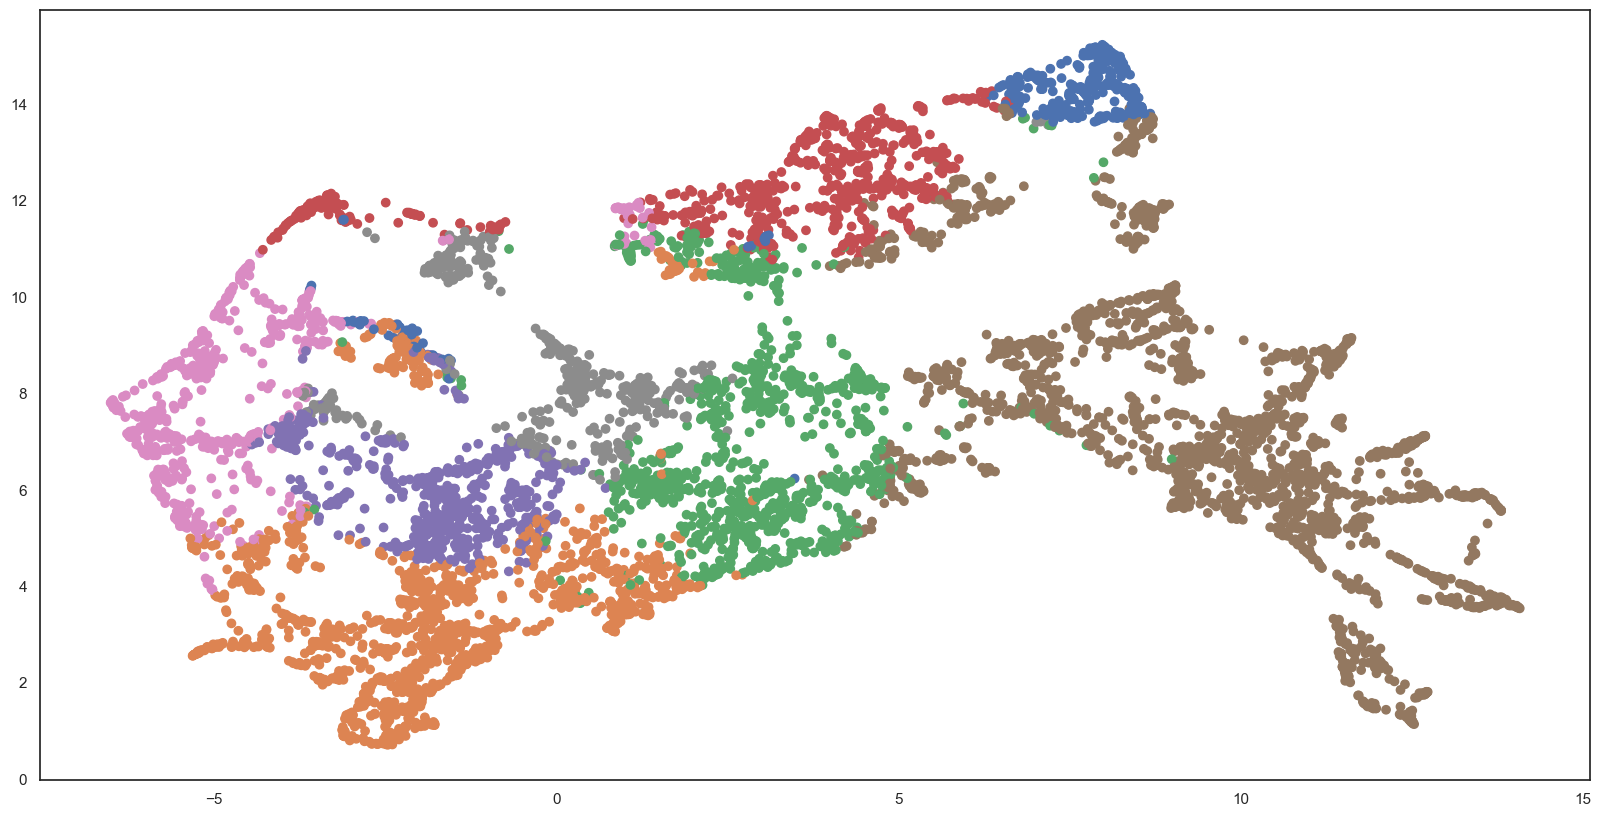

In [90]:
# Plot for 8 clusters

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(20,10)})

fig, ax = plt.subplots(1,1)


ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_original.labels_7]
    )

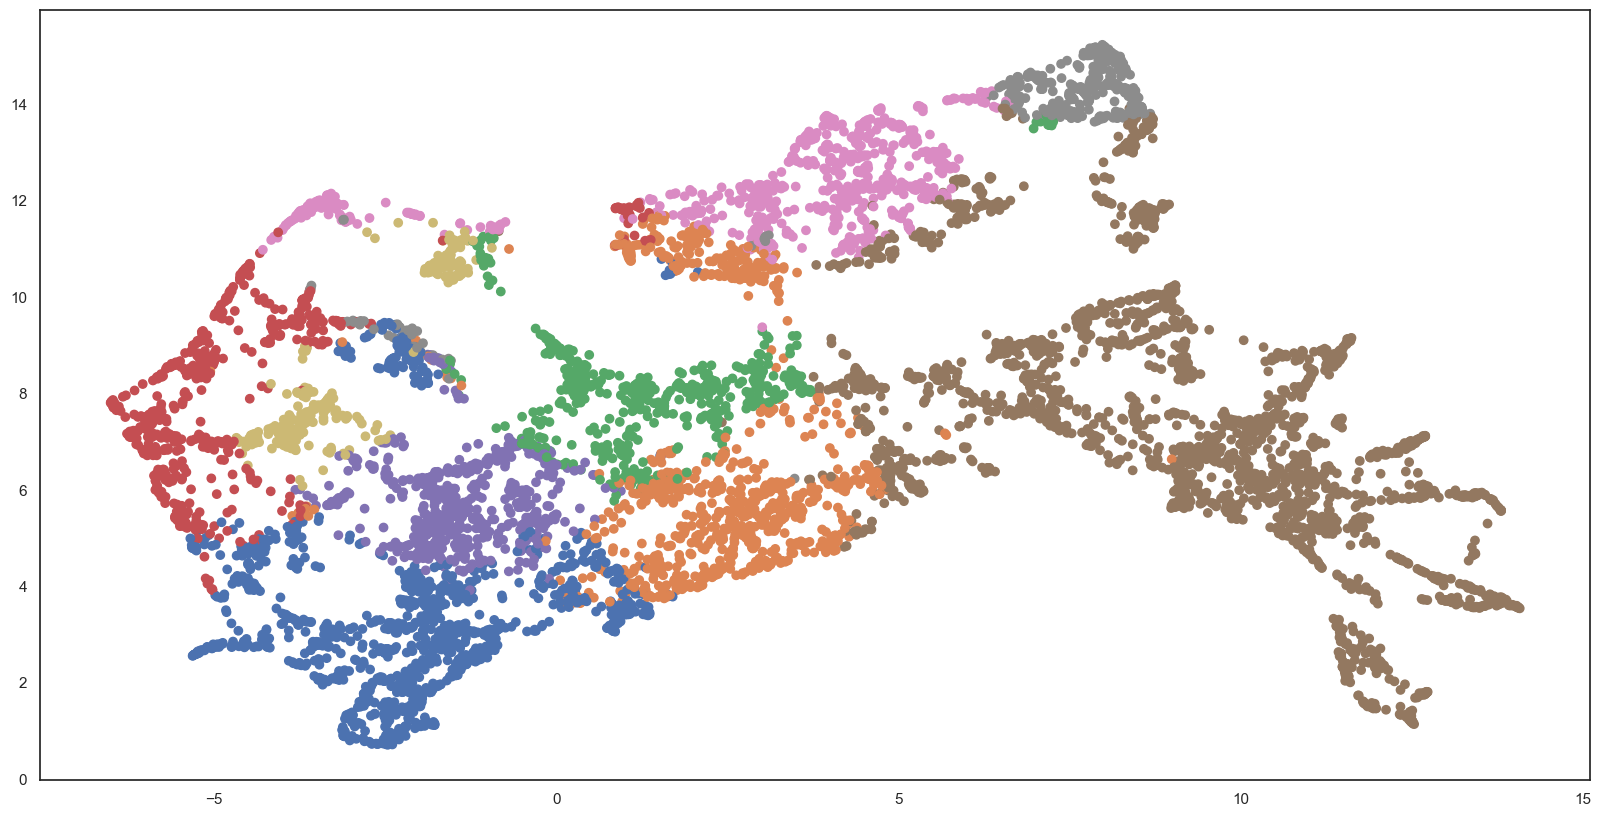

In [91]:
# Plot for 9 clusters

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(20,10)})

fig, ax = plt.subplots(1,1)


ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_original.labels_8]
    )

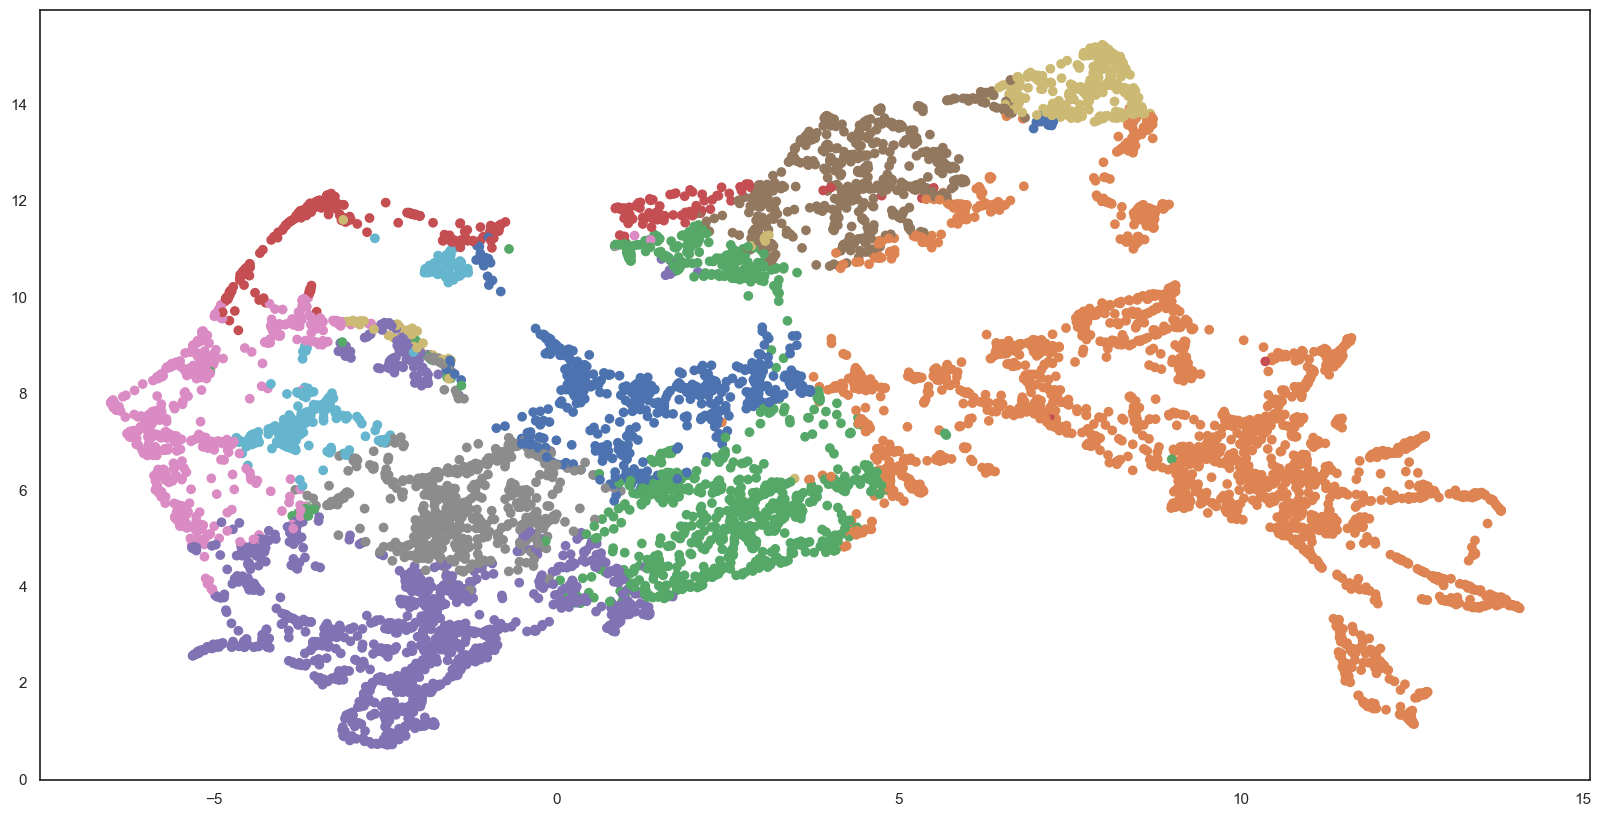

In [92]:
# Plot for 10 clusters

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(20,10)})

fig, ax = plt.subplots(1,1)


ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_original.labels_9]
    )